<a href="https://colab.research.google.com/github/gayatridevi524/project-folder-524/blob/master/Employee_Burnout_prediction_and_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**





In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings('ignore') #ignoring warning messages during code execution

In [ ]:
# Loading files from the colab
from google.colab import files
uploaded = files.upload()

Saving employee_burnout.csv to employee_burnout.csv


**Loading Dataset**

In [ ]:
#reads the csv file
data = pd.read_csv("employee_burnout.csv")
data  #prints the loaded dataset


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
#returns the shape of the dataset
data.shape

(22750, 9)

In [ ]:
#returns the structure and type of data stored
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [ ]:
# converting string to datetime data type
data["Date of Joining"]=pd.to_datetime(data["Date of Joining"])

In [ ]:
# now the data type of the DOJ column changed to datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
#returns the first 5 rows of the data
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-10-03,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
# returns the columns present in the data
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
# calculates the number of null values in each column of the data
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
# checks for the duplicated values
data.duplicated().sum()

0

In [ ]:
# calculates the mean,std,min,max,count of every attribute
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
# shows the unique values
for col in data.columns:
    unique_values = data[col].unique()#retrives unique values in the current column of data
    value_counts = data[col].value_counts()# calculates the count of each unique value in the current column using value_counts function
    print(f"\n\n{unique_values}")
    print(f"\n{value_counts}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-10-03T00:00:00.000000000' '2008-03-11T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-02-01T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-09-03T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-12-05T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [ ]:
# Droping out the irrelevant column as it was no longer required
data=data.drop(["Employee ID"],axis=1)

In [ ]:
# Replaces null values with mean values
data["Resource Allocation"].fillna(data["Resource Allocation"].mean(),inplace=True)
data["Mental Fatigue Score"].fillna(data["Mental Fatigue Score"].mean(),inplace=True)
data["Burn Rate"].fillna(data["Burn Rate"].mean(),inplace=True)

In [ ]:
# again check for the null values
data.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
# calculates the correlation between the features of data -1 indicates negative,0 indicates none,+1 indicates positive
data.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


**Data Visualization**

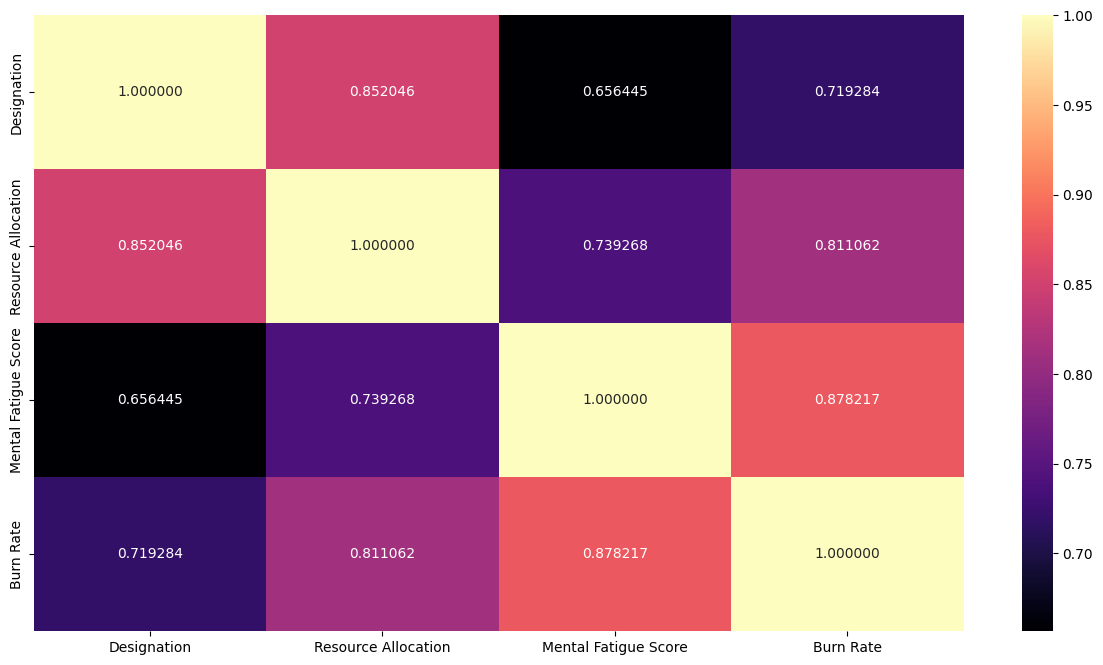

In [ ]:
# Plotting heatmap to check the correlation
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt=".6f", cmap="magma", ax=ax)
plt.show()

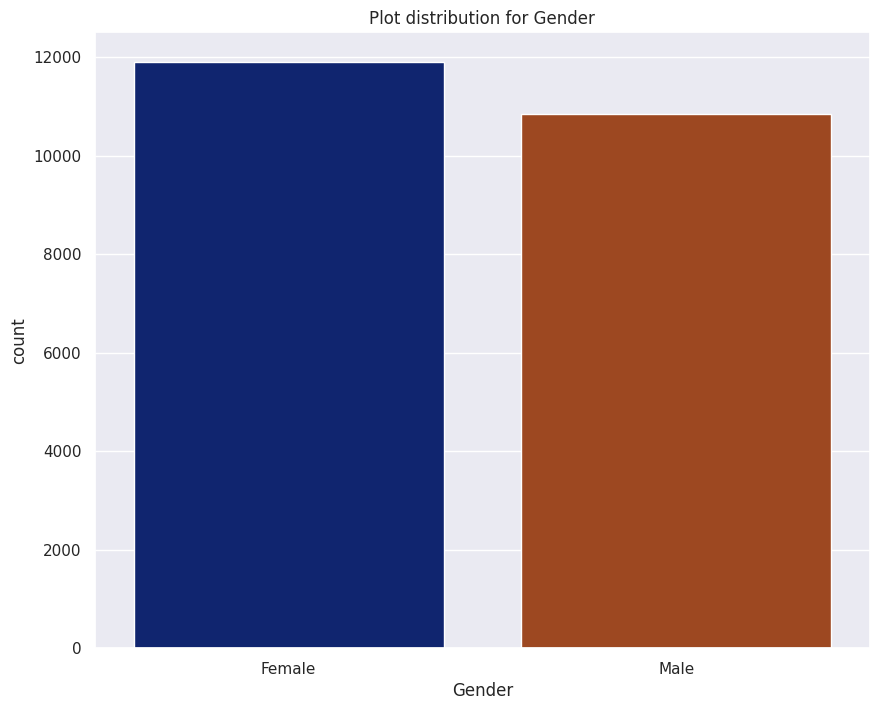

In [ ]:
# Count plot distribution based on Gender
plt.figure(figsize=(10, 8))
sns.set_theme(style="darkgrid", palette="dark")
sns.countplot(x="Gender", data=data)
plt.title("Plot distribution for Gender")
plt.show()

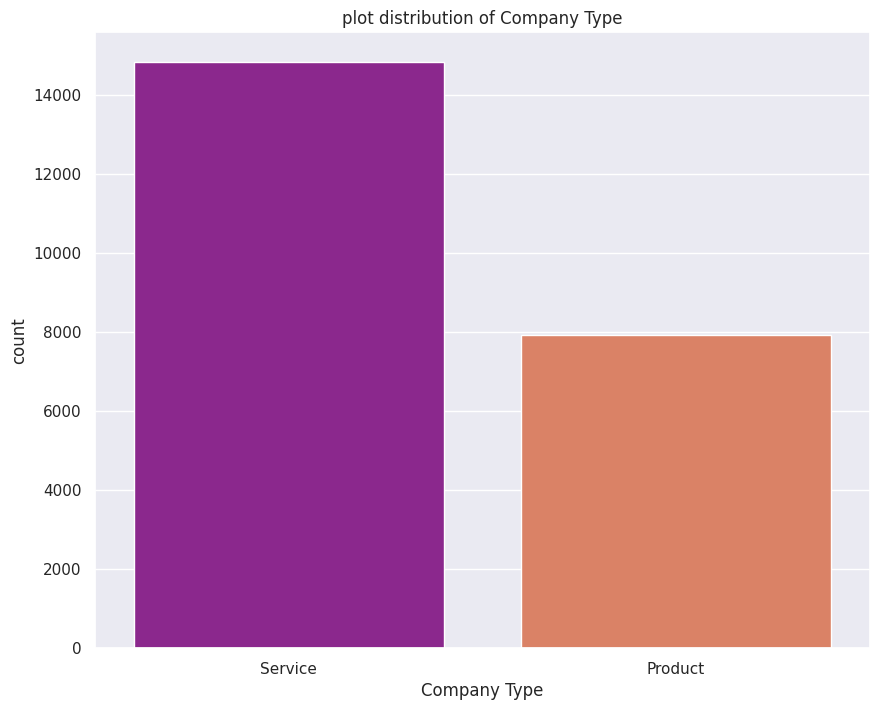

In [ ]:
#count plot distribution of company type
plt.figure(figsize=(10,8))
sns.countplot(x = 'Company Type', data = data,palette='plasma');
plt.title("plot distribution of Company Type")
plt.show()

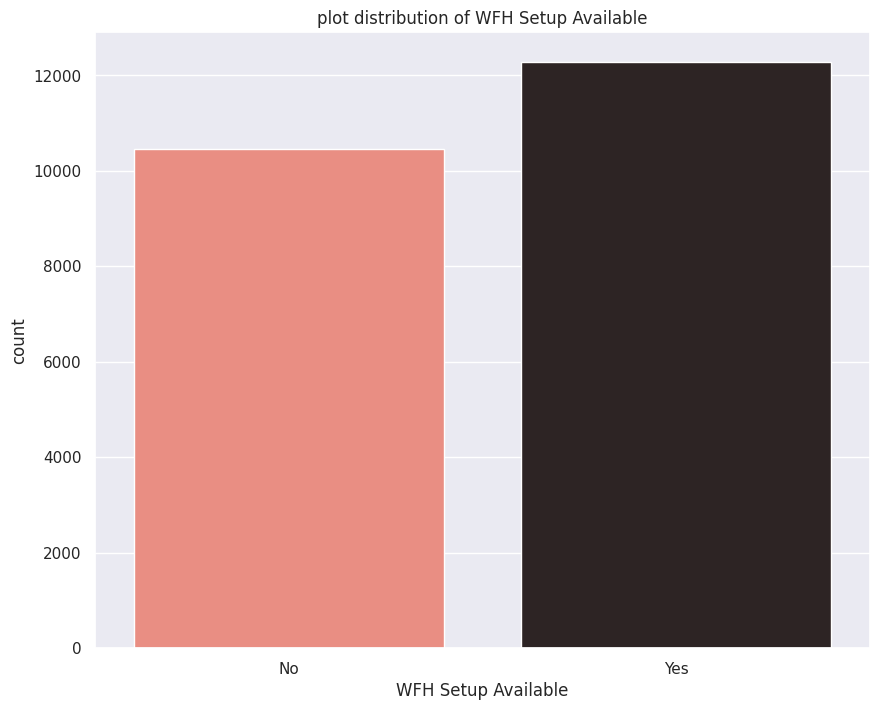

In [ ]:
#count plot distribution of "WFH setup available"
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available",data=data,palette="dark:salmon_r")
plt.title("plot distribution of WFH Setup Available")
plt.show()

In [ ]:
#count plot distribution of attributes with the help of histogram
burn_st=data.loc[:,"Date of Joining":"Burn Rate"]
burn_st=burn_st.select_dtypes([int,float])
color_sequence = ["steelblue"]
for col in burn_st.columns:
  fig=px.histogram(burn_st,x=col,title="plot distribution of "+col,color_discrete_sequence=color_sequence)
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
#plot distribution of the Burn rate on the basis of Designation
fig=px.line(data,y="Burn Rate",color="Designation",title="Burn Rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

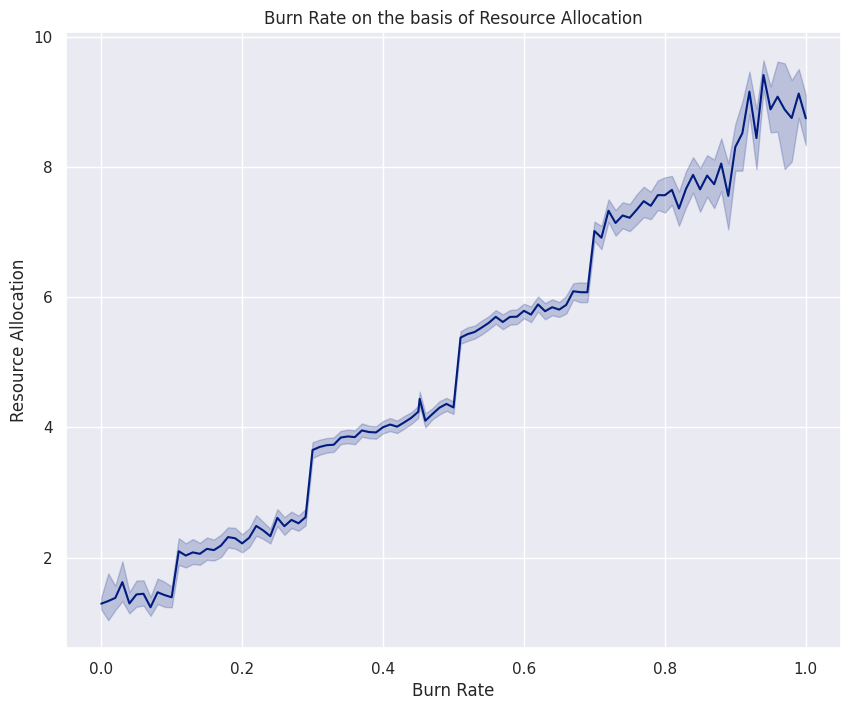

In [ ]:
#Plot distribution of burn rate on the basis of Resource Allocation
plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x="Burn Rate", y="Resource Allocation", palette="Pastel1")
plt.title("Burn Rate on the basis of Resource Allocation")
plt.show()

<Figure size 1000x800 with 0 Axes>

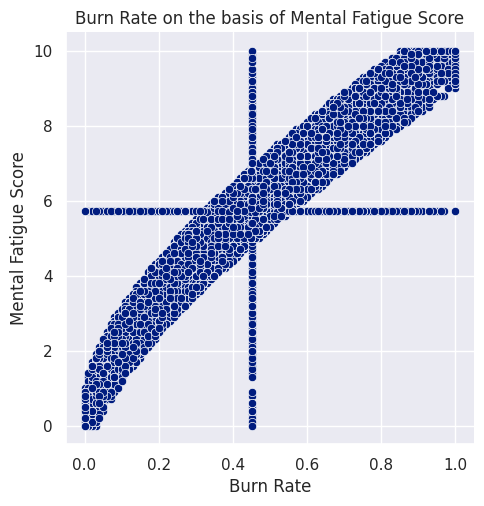

In [ ]:
#plot distribution of mental fatigue score on the basis of Designation
plt.figure(figsize=(10, 8))
sns.relplot(data=data, x="Burn Rate", y="Mental Fatigue Score", palette="Pastel1")
plt.title("Burn Rate on the basis of Mental Fatigue Score")
plt.show()

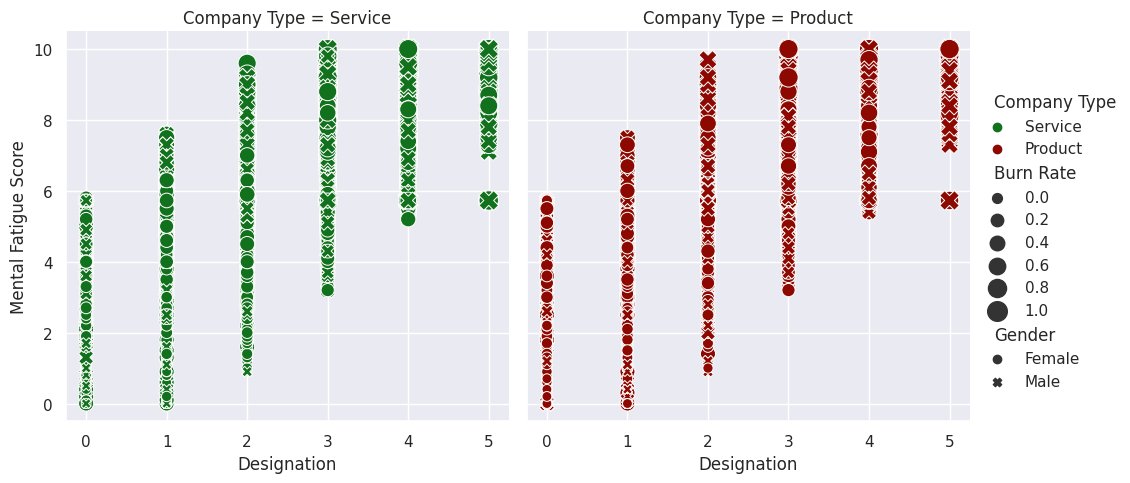

In [ ]:
#plot distribution of "Designation vs mental fatigue" as per Company type,Burn rate and Gender
sns.relplot(
    data=data,x="Designation",y="Mental Fatigue Score",col="Company Type",
    hue="Company Type",size="Burn Rate",style="Gender",
    palette=['g','r'],sizes=(50,200)
)

In [ ]:
# calculation based on some stats related to burnout rate
data['Burnout Category'] = np.where(
    data['Burn Rate'] > 0.7, "Extreme",
    np.where((data["Burn Rate"] >= 0.5) & (data["Burn Rate"] < 0.7), "Moderate",
    np.where(data['Burn Rate'] < 0.5, "Slight", "No Burnout"  )))

In [ ]:
#Plot distribution of Burnout Category based on Gender
fig = px.histogram(data, x="Burnout Category", color="Gender", title="Count of Burnout Category by Gender",
                   color_discrete_sequence=["steelblue", "indianred"])
fig.show()

In [ ]:
#Plot distribution of Burnout Category based on Company Type
fig = px.histogram(data, x="Burnout Category", color="Company Type", title="Count of Burnout Category by Company Type",
                   color_discrete_sequence=["steelblue", "purple"])
fig.show()

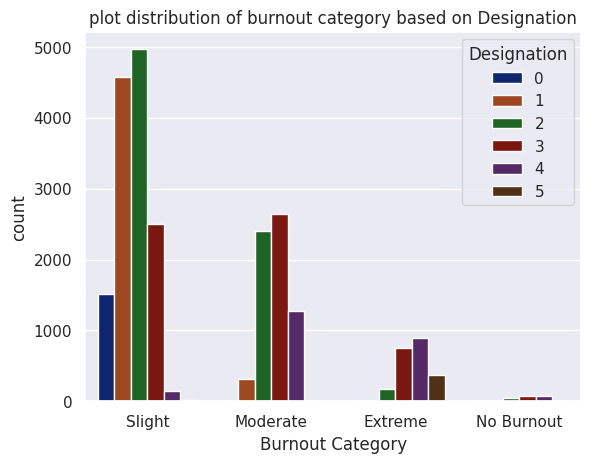

In [ ]:
#plot distribution of burnout category based on Designation
sns.countplot(x = "Burnout Category", data = data, hue = "Designation");
plt.title("plot distribution of burnout category based on Designation")
plt.show()

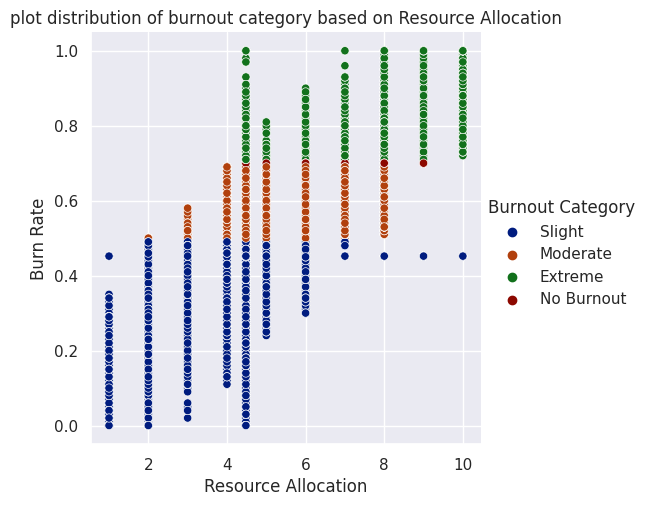

In [ ]:
#plot distribution of burnout category based on Resource Allocation
sns.relplot(x = "Resource Allocation", y = "Burn Rate", data = data, hue = "Burnout Category");
plt.title("plot distribution of burnout category based on Resource Allocation")
plt.show()

**Label Encoding**

In [ ]:
# Importing Label Encoder and assigning it to a new variable
from sklearn import preprocessing
label_encode=preprocessing.LabelEncoder()

In [ ]:
data['GenderLabel']=label_encode.fit_transform(data["Gender"].values)
data["Company_TypeLabel"]=label_encode.fit_transform(data["Company Type"].values)
data['WFH_Setup_AvailableLabel']=label_encode.fit_transform(data["WFH Setup Available"].values)

In [ ]:
#check assigned values for Gender
gn=data.groupby('Gender')
gn=gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
#ckeck assigned values for Company Type
ct=data.groupby('Company Type')
ct=ct["Company_TypeLabel"]
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [ ]:
#checks assigned value for WFH setup available
wsa=data.groupby('WFH Setup Available')
wsa=wsa['WFH_Setup_AvailableLabel']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [ ]:
# returns the last 10 rows of the data
data.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Burnout Category,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
22740,2008-05-09,Female,Product,No,3,6.0,7.300000,0.550000,Moderate,0,0,0
22741,2008-07-01,Male,Product,No,2,5.0,6.000000,0.452005,Slight,1,0,0
22742,2008-07-28,Male,Product,No,3,5.0,8.100000,0.690000,Moderate,1,0,0
22743,2008-12-15,Female,Product,Yes,1,3.0,6.000000,0.480000,Slight,0,0,1
22744,2008-05-27,Male,Product,No,3,7.0,6.200000,0.540000,Moderate,1,0,0
22745,2008-12-30,Female,Service,No,1,3.0,5.728188,0.410000,Slight,0,1,0
22746,2008-01-19,Female,Product,Yes,3,6.0,6.700000,0.590000,Moderate,0,0,1
22747,2008-05-11,Male,Service,Yes,3,7.0,5.728188,0.720000,Extreme,1,1,1
22748,2008-10-01,Female,Service,No,2,5.0,5.900000,0.520000,Moderate,0,1,0
22749,2008-06-01,Male,Product,No,3,6.0,7.800000,0.610000,Moderate,1,0,0


**Feature Selection**

In [ ]:
# Feature Selection
columns=['Designation','Resource Allocation','Mental Fatigue Score',
         'GenderLabel','Company_TypeLabel','WFH_Setup_AvailableLabel']
X=data[columns] # independent variables
y=data["Burn Rate"] # dependent variable

In [ ]:
print(X)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [ ]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


**Data Splitting**

In [ ]:
# splits the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
# print the shape of the splitting data
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(17062, 6) (5688, 6) (17062,) (5688,)


**Model Implementation**

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest regression model
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

# Make predictions on the train set
train_pred_rf=rf_model.predict(X_train)

# Make predictions on the test set
test_pred_rf=rf_model.predict(X_test)

#Accuracy Score
test_r2=r2_score(y_test,test_pred_rf)
print("Accuracy score of test data: "+str(round(100*test_r2,4))+"%")
#Mean Squared Error
mse = mean_squared_error(y_test, test_pred_rf)
print("Mean Squared Error is: ", mse)

Accuracy score of test data: 83.6801%
Mean Squared Error is:  0.006018317246599166


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the gradient boosting regression model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions on the training set
train_pred_gb = gb_model.predict(X_train)

# Make predictions on the test set
test_pred_gb = gb_model.predict(X_test)

# Accuracy Score
test_r2 = r2_score(y_test, test_pred_gb)
print("Accuracy score of test data: " + str(round(100 * test_r2, 4)) + "%")
#Mean Squared Error
mse = mean_squared_error(y_test, test_pred_gb)
print("Mean Squared Error is: ", mse)


Accuracy score of test data: 85.8773%
Mean Squared Error is:  0.005208053557740668


In [50]:
# testing the model
new_employee = [[4, 8.0, 7.5, 1, 0, 1]]  # Example features for the new employee
predicted_burnout_rate = gb_model.predict(new_employee)
print("Predicted Burnout Rate for the new employee:", predicted_burnout_rate)
if predicted_burnout_rate>=0.7:
  print("the employee falls under Extremely burned out")
elif predicted_burnout_rate>=0.5 and predicted_burnout_rate<0.7:
  print("The employee falls under Moderately burned out")
elif predicted_burnout_rate>0.0 and predicted_burnout_rate<0.5:
  print("The employee falls under Slightly burned out")
else:
  print("The employee not burned out")

Predicted Burnout Rate for the new employee: [0.67891939]
The employee falls under Moderately burned out
